In [98]:
# DATS 6103 Srilatha Lakka Project - 2
# Purpose of Project
#1. Learning about Data Mining
#2. Learning to extract information from raw data using Python 

'''
About the Data
Data, Trends and Maps is an interactive database that provides data on obesity status '''

#Import required libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import os
import numpy as np
%matplotlib inline
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly import tools
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math


In [99]:
py.sign_in('slakka','Pf5T4X7egwQ1QcQZhcJM')

In [100]:
#Extracting Obesity data by state for the year 2017 
'''
PURPOSE
"Children and youth are getting fatter every decade”. I found this claim slightly unbelievable, so I decided to investigate…
'''

df= ((pd.read_excel('Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.xlsx', usecols=(0,2,3,5,7,10,18,29))).fillna(0))
df = df.dropna()

df.head()

,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value,Age(years),StratificationCategory1
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,0,Total
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,0,Gender
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,0,Gender
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,0,Education
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,0,Education


In [101]:
'''
CLEAN AND FORMAT DATA:
Get required data to perform analysis
'''


df1 = df[df['Class'] == ("Obesity / Weight Status")]

df2 = df1[df1['Question'] == ("Percent of adults aged 18 years and older who have obesity")]

df3 = df2[df2['StratificationCategory1'] == ("Age (years)")]

df4 = df3[df3['YearStart'] == (2017)]

df5 = df4[df4['Age(years)'] == ("18 - 24")]

#df5 = df4[df4['Stratification1'] == ("18-24")]

df5.head(10)



,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value,Age(years),StratificationCategory1
56867,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,16.5,18 - 24,Age (years)
56927,2017,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,20.7,18 - 24,Age (years)
56954,2017,AK,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.0,18 - 24,Age (years)
56981,2017,AZ,Arizona,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,18.2,18 - 24,Age (years)
57008,2017,AR,Arkansas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,13.3,18 - 24,Age (years)
57035,2017,CA,California,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,12.7,18 - 24,Age (years)
57062,2017,CO,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,13.1,18 - 24,Age (years)
57089,2017,CT,Connecticut,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,16.2,18 - 24,Age (years)
57116,2017,DE,Delaware,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,15.5,18 - 24,Age (years)
57143,2017,DC,District of Columbia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,16.0,18 - 24,Age (years)


In [102]:
'''
   Map US Obesity Percentage by state using plotly
   Initial I used LocationDesc column which had State Names, but the Map graph did not show the State Names when hovered over
   so I used other column (LocationAbbr) that was available in the dataset which had State abbrevations. Hover over the states
   we can see State and percentage of Obesity in those states '''

scale = [[0.0, 'rgb(223,221,228)'], [0.2, 'rgb(199,199,201)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'], [1.0, 'rgb(63,20,122)']]

def mapper():
    data = [dict(type='choropleth',
                 colorscale=scale,
                 locations=df5['LocationAbbr'],
                 z=df5['Data_Value'],
                 locationmode='USA-states',
                 text=df5['LocationAbbr'],
                 hoverinfo='location+z',
                 marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
                 colorbar=dict(title='"Obesity By State For The Year 2017" '))]
    
    layout = dict(title='"Obesity By State For The Year 2017" ' + '<br> Hover for value',
                  geo=dict(scope='USA',
                           projection=dict(type='albers usa'), showlakes=True, 
                                                               lakecolor='rgb(95,145,237)'))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.xlsx')

In [6]:
mapper()
'''
The darker regions on the map indicate the State (Oklahoma) with highest percentage of Obese Adult population. 
The state with minimum obese adult population is Massachusetts.
'''

In [7]:
#Extracting Obesity Percentage by Top 10 states which have highest percentage for the year 2017 

df6 = df5.nlargest(10, ['Data_Value']) 

Top10 = df6.drop(['YearStart', 'LocationAbbr','Class','Question','Age(years)','StratificationCategory1'], axis=1).dropna()

Top10.head()

Top10 = Top10.set_index('LocationDesc')

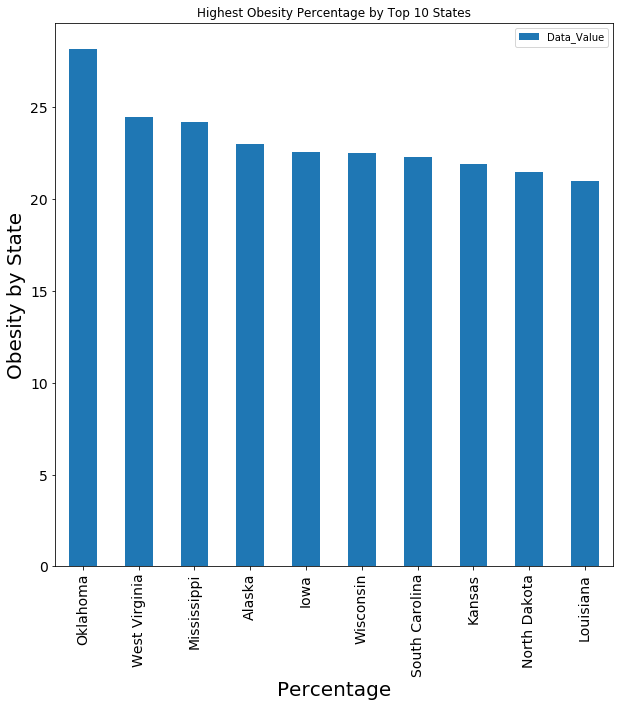

In [8]:
# Creating a bar diagram showing obesity percentage of top states, in the year 2017.

ax1 = Top10.plot( kind='bar', width= .5, figsize = (10,10),  fontsize = 14, 
                 title = 'Highest Obesity Percentage by Top 10 States')
plt.legend(loc = 'best')
ax1.set_xlabel('Percentage', fontsize = 20)
ax1.set_ylabel('Obesity by State', fontsize = 20)
plt.show()

In [9]:
#Extracting Obesity data by state for the year 2017 
df= ((pd.read_excel('Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.xlsx', usecols=(0,2,3,5,7,10,18,29,30))).fillna(0))
df = df.dropna()

df.head()

,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value,Age(years),StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,0,Total,Total
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,0,Gender,Male
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,0,Gender,Female
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,0,Education,Less than high school
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,0,Education,High school graduate


In [10]:
# Further analysis to find obesity by gender for above top 10 states

#Extracting Obesity data by gender for the year 2017
# Further analysis to find obesity by gender for above top 10 states

df1gen = df[df['Class'] == ("Obesity / Weight Status")]

df2gen = df1gen[df1gen['Question'] == ("Percent of adults aged 18 years and older who have obesity")]

df3gen = df2gen[df2gen['StratificationCategory1'] == ("Gender")]

df4gen = df3gen[df3gen['YearStart'] == (2017)]

#df5 = df4[df4['Stratification1'] == ("18-24")]

df4gen.head()


,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value,Age(years),StratificationCategory1,Stratification1
56862,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.2,0,Gender,Male
56863,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.0,0,Gender,Female
56921,2017,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.1,0,Gender,Male
56922,2017,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.4,0,Gender,Female
56948,2017,AK,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.6,0,Gender,Male


In [11]:
df4gentop = df4gen.nlargest(10, ['Data_Value']) 

Top10 = df4gentop.drop(['YearStart', 'LocationAbbr','Class','Question','Age(years)','StratificationCategory1'], axis=1).dropna()

#Rename Columns
Top10.rename(columns={'LocationDesc':'State','Data_Value':'Obesity Percentage','Stratification1':'Gender'}, inplace=True)


Top10 = Top10.set_index('State')

Top10.head(10)

,Obesity Percentage,Gender
State,,
West Virginia,39.4,Male
Mississippi,38.8,Female
Alabama,37.4,Female
Arkansas,37.4,Female
Oklahoma,36.9,Male
Guam,36.9,Male
West Virginia,36.7,Female
Louisiana,36.5,Female
Iowa,36.4,Male


In [12]:
by_state_gen = Top10.groupby(['State','Obesity Percentage','Gender'])

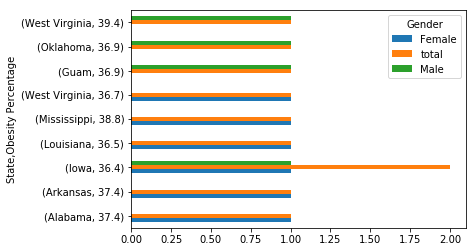

In [13]:
cat_gen_sz = by_state_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1) 
cat_gen_sz = cat_gen_sz.sort_values(by='Female', ascending=True) 
cat_gen_sz[['Female', 'total', 'Male']].plot(kind='barh')

In [14]:
#Extracting Obesity data by state for the year 2017 
df= ((pd.read_excel('Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.xlsx', usecols=(0,2,3,5,7,10,29,30))).fillna(0))
df = df.dropna()




In [15]:

# Further analysis to find obesity by Ethnicity for top 10 states

#Extracting Obesity data by Ethnicity for the year 2017

df1gen = df[df['Class'] == ("Obesity / Weight Status")]

df2gen = df1gen[df1gen['Question'] == ("Percent of adults aged 18 years and older who have obesity")]

df3gen = df2gen[df2gen['StratificationCategory1'] == ("Race/Ethnicity")]

df4gen = df3gen[df3gen['YearStart'] == (2017)]

#df5 = df4[df4['Stratification1'] == ("18-24")]

df4gen.head()



,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value,StratificationCategory1,Stratification1
56880,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.3,Race/Ethnicity,Non-Hispanic White
56881,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.0,Race/Ethnicity,Non-Hispanic Black
56882,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.4,Race/Ethnicity,Hispanic
56883,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,11.2,Race/Ethnicity,Asian
56884,2017,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.5,Race/Ethnicity,Hawaiian/Pacific Islander


In [40]:
df4gentop = df4gen.nlargest(10, ['Data_Value']) 

Top10 = df4gentop.drop(['YearStart', 'LocationAbbr','Class','Question','StratificationCategory1'], axis=1).dropna()

#Rename Columns
Top10.rename(columns={'LocationDesc':'State','Data_Value':'Obesity Percentage','Stratification1':'Ethnicity'}, inplace=True)

Top10['State & Ethinicity'] = Top10['State'] +'-'+ '('+Top10['Ethnicity']+ ')'

Top10 = Top10.set_index('State & Ethinicity')


Top10.head(10)



,State,Obesity Percentage,Ethnicity
State & Ethinicity,,,
West Virginia-(2 or more races),West Virginia,52.8,2 or more races
Nevada-(American Indian/Alaska Native),Nevada,50.8,American Indian/Alaska Native
Arkansas-(American Indian/Alaska Native),Arkansas,50.3,American Indian/Alaska Native
South Dakota-(American Indian/Alaska Native),South Dakota,48.7,American Indian/Alaska Native
Pennsylvania-(2 or more races),Pennsylvania,48.4,2 or more races
Texas-(American Indian/Alaska Native),Texas,48.2,American Indian/Alaska Native
Florida-(American Indian/Alaska Native),Florida,46.7,American Indian/Alaska Native
Alabama-(American Indian/Alaska Native),Alabama,46.6,American Indian/Alaska Native
North Dakota-(American Indian/Alaska Native),North Dakota,46.4,American Indian/Alaska Native


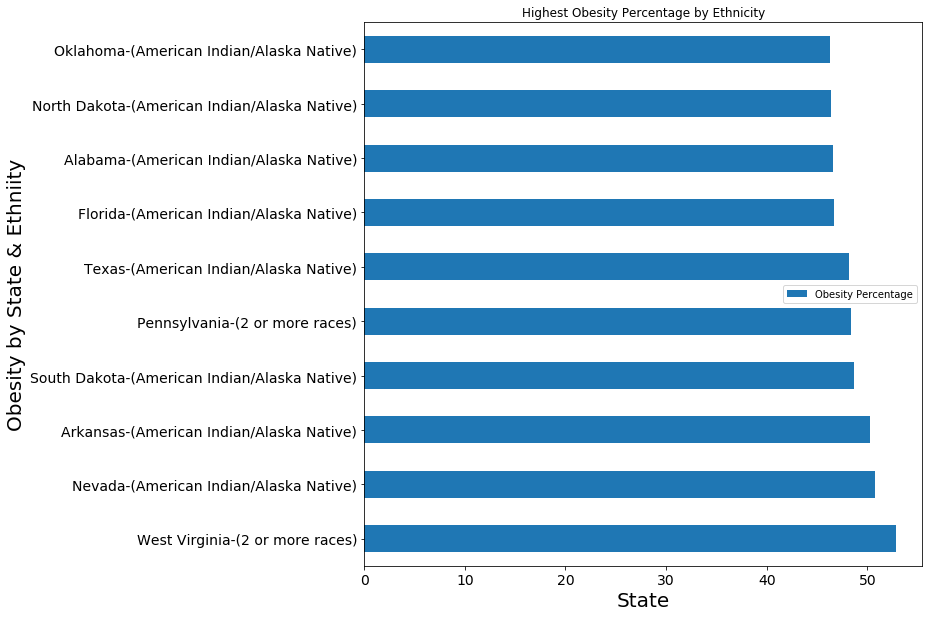

In [42]:
# Creating a bar diagram showing obesity percentage by Ethnicity, in the year 2017.

ax1 = Top10.plot( kind='barh', width= .5, figsize = (10,10),  fontsize = 14, 
                 title = 'Highest Obesity Percentage by Ethnicity')
plt.legend(loc = 'best')
ax1.set_xlabel('State', fontsize = 20)
ax1.set_ylabel('Obesity by State & Ethniity', fontsize = 20)
plt.show()

In [238]:
#Extracting Obesity data by state for year 2011-2017
df= ((pd.read_excel('Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.xlsx', usecols=(0,2,3,10,18,30,31))).fillna(0))


In [252]:
# Further analysis to find obesity by age group

df3gen = df[df['StratificationCategoryId1'] == ("AGEYR")]
#df3gen = df3gen[df3gen['YearStart'] == (2017)]

df3gen.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Age(years),Stratification1,StratificationCategoryId1
7,2011,AL,Alabama,16.3,18 - 24,18 - 24,AGEYR
8,2011,AL,Alabama,35.2,25 - 34,25 - 34,AGEYR
9,2011,AL,Alabama,35.5,35 - 44,35 - 44,AGEYR
10,2011,AL,Alabama,38.0,45 - 54,45 - 54,AGEYR
11,2011,AL,Alabama,36.4,55 - 64,55 - 64,AGEYR


In [253]:
Top10 = df3gen.drop(['StratificationCategoryId1'], axis=1).dropna()

In [254]:
Top10.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Age(years),Stratification1
7,2011,AL,Alabama,16.3,18 - 24,18 - 24
8,2011,AL,Alabama,35.2,25 - 34,25 - 34
9,2011,AL,Alabama,35.5,35 - 44,35 - 44
10,2011,AL,Alabama,38.0,45 - 54,45 - 54
11,2011,AL,Alabama,36.4,55 - 64,55 - 64


In [255]:

#Rename Columns 
Top10.rename(columns={'Data_Value':'Obesity Percentage','YearStart':'Year'}, inplace=True)

Top10group.head()


Top10group = Top10.groupby(['Age(years)','Year'],as_index=False).agg({"Obesity Percentage": "sum"})

Top10group.head()

,Age(years),Year,Obesity Percentage
0,18 - 24,2011,11597.6
1,18 - 24,2012,2869.7
2,18 - 24,2013,11552.1
3,18 - 24,2014,3098.5
4,18 - 24,2015,11972.0


In [256]:
'''
If you look at the Top10 table, the first value is a number. This is the index, and Pandas uses the default Excel practice 
of having a number as the index. However, we want to change the index to Year. This will make plotting much easier, 
since the index is usually plotted as the x axis.

'''
Top10pivot = Top10group.pivot(columns='Age(years)', index='Year', values='Obesity Percentage')

Top10pivot.head()

Age(years),18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 or older
Year,,,,,,
2011,11597.6,11237.1,11329.5,11522.3,11590.7,11667.7
2012,2869.7,4052.6,4621.6,4878.1,5091.2,5083.7
2013,11552.1,11459.5,11535.2,11638.9,11654.7,11873.8
2014,3098.5,4282.2,4852.7,5149.0,5319.8,5325.3
2015,11972.0,11940.6,11988.3,12144.8,12148.3,12438.2


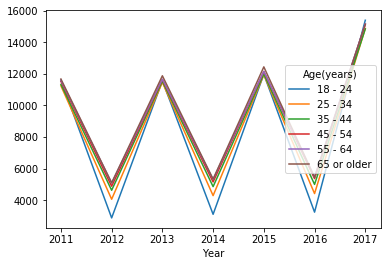

In [188]:
# Plot
Top10pivot.plot()
plt.show()

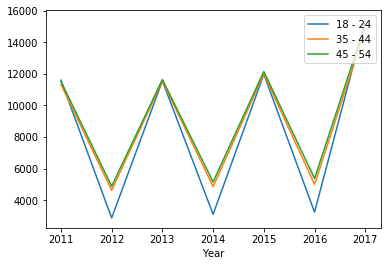

In [174]:
'''
Let’s just plot a small section of the data: 18-24 and grown ups in the age range of 35-44.

Coming back to our original question: Are children and youth getting obese?

Let’s just plot a small section of the data: 18-24, 35-44 and in the age range of 35-44.
'''

plt.close()

# Plot Youth vs adults
Top10pivot['18 - 24'].plot(label="18 - 24")
Top10pivot['35 - 44'].plot(label="35 - 44")
Top10pivot['45 - 54'].plot(label="45 - 54")
plt.legend(loc="upper right")
plt.show()

'''
Who is getting obese?

Age group 18-24 obesity has gone slightly down, but older age group(35-44 and 45-54) are high in obese

'''


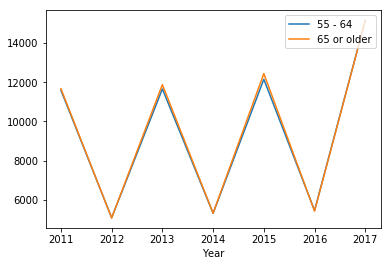

In [177]:
'''
Let’s plot a small section of the data: 55-64 & 65 and older
'''

plt.close()

# Plot adults
Top10pivot['55 - 64'].plot(label="55 - 64")
Top10pivot['65 or older'].plot(label="65 or older")
plt.legend(loc="upper right")
plt.show()

#Seems like both age groups are almost similar in obsese


In [189]:
# Further analysis to find obesity by Education

df3gen = df[df['StratificationCategoryId1'] == ("EDU")]
#df3gen = df3gen[df3gen['YearStart'] == (2017)]

df3gen.head()

,YearStart,LocationAbbr,Data_Value,Age(years),Stratification1,StratificationCategoryId1
3,2011,AL,33.6,0,Less than high school,EDU
4,2011,AL,32.8,0,High school graduate,EDU
5,2011,AL,33.8,0,Some college or technical school,EDU
6,2011,AL,26.4,0,College graduate,EDU
31,2011,AL,33.2,0,Less than high school,EDU


In [190]:
Top10 = df3gen.drop(['StratificationCategoryId1', 'Age(years)','LocationAbbr'], axis=1).dropna()

Top10.head()

,YearStart,Data_Value,Stratification1
3,2011,33.6,Less than high school
4,2011,32.8,High school graduate
5,2011,33.8,Some college or technical school
6,2011,26.4,College graduate
31,2011,33.2,Less than high school


In [193]:
#Rename Columns 
Top10.rename(columns={'Data_Value':'Obesity Percentage','YearStart':'Year','Stratification1':'Education'}, inplace=True)

Top10group.head()


Top10group = Top10.groupby(['Education','Year'],as_index=False).agg({"Obesity Percentage": "sum"})

Top10group.head()

,Education,Year,Obesity Percentage
0,College graduate,2011,12082.1
1,College graduate,2012,3700.2
2,College graduate,2013,12172.7
3,College graduate,2014,3906.7
4,College graduate,2015,12684.7


In [198]:
Top10pivot = Top10group.pivot(columns='Education', index='Year', values='Obesity Percentage')

Top10pivot.head(10)

Education,College graduate,High school graduate,Less than high school,Some college or technical school
Year,,,,
2011,12082.1,11152.7,10658.9,11664.0
2012,3700.2,4904.0,5487.5,4362.3
2013,12172.7,11337.2,10604.6,11850.2
2014,3906.7,5163.8,5735.2,4636.9
2015,12684.7,11823.2,11214.1,12255.7
2016,4047.7,5273.7,5996.7,4833.0
2017,14887.5,15228.9,14972.3,15191.5


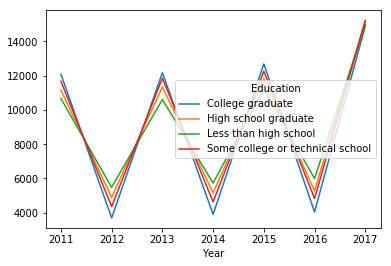

In [195]:
# Plot
Top10pivot.plot()
plt.show()

# Seems like College graduates are obese, followed by Technical school

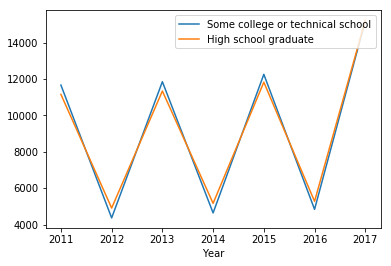

In [199]:
plt.close()

# Plot Youth vs adults
#Top10pivot['College graduate'].plot(label="College graduate")
Top10pivot['Some college or technical school'].plot(label="Some college or technical school")
Top10pivot['High school graduate'].plot(label="High school graduate")
plt.legend(loc="upper right")
plt.show()

'''
Seems like College graduates are obese, followed by Technical school in 2016, but in 2017 High school graduates seems 
to obese than other levels of education
'''




In [242]:
# To find overall obesity percentage

df3gen = df[df['StratificationCategoryId1'] == ("OVR")]
df3gen = df3gen[df3gen['YearStart'] == (2017)]

df3gen.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Age(years),Stratification1,StratificationCategoryId1
44638,2017,US,National,50.3,0,Total,OVR
44666,2017,AL,Alabama,42.8,0,Total,OVR
44667,2017,AK,Alaska,58.3,0,Total,OVR
44669,2017,AZ,Arizona,52.7,0,Total,OVR
44670,2017,AR,Arkansas,45.4,0,Total,OVR


In [245]:
Top10 = df3gen.drop(['StratificationCategoryId1', 'Age(years)','Stratification1'], axis=1).dropna()

Top10.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value
44638,2017,US,National,50.3
44666,2017,AL,Alabama,42.8
44667,2017,AK,Alaska,58.3
44669,2017,AZ,Arizona,52.7
44670,2017,AR,Arkansas,45.4


In [247]:
#Rename Columns 

df4gentop = Top10.nlargest(10, ['Data_Value']) 

df4gentop.rename(columns={'Data_Value':'Obesity Percentage','YearStart':'Year','LocationDesc':'State'}, inplace=True)

df4gentop.head()


df4gentopgroup = df4gentop.groupby(['State','Year'],as_index=False).agg({"Obesity Percentage": "sum"})

df4gentopgroup.head(10)

,State,Year,Obesity Percentage
0,Alaska,2017,58.3
1,California,2017,57.5
2,Colorado,2017,58.7
3,Hawaii,2017,56.5
4,Idaho,2017,54.8
5,Oregon,2017,56.9
6,Puerto Rico,2017,56.0
7,Vermont,2017,59.7
8,Washington,2017,57.9
9,Wisconsin,2017,57.1


In [248]:
Top10pivot = df4gentopgroup.pivot(columns='Year', index='State', values='Obesity Percentage')


Top10pivot.head(50)



Year,2017
State,
Alaska,58.3
California,57.5
Colorado,58.7
Hawaii,56.5
Idaho,54.8
Oregon,56.9
Puerto Rico,56.0
Vermont,59.7
Washington,57.9


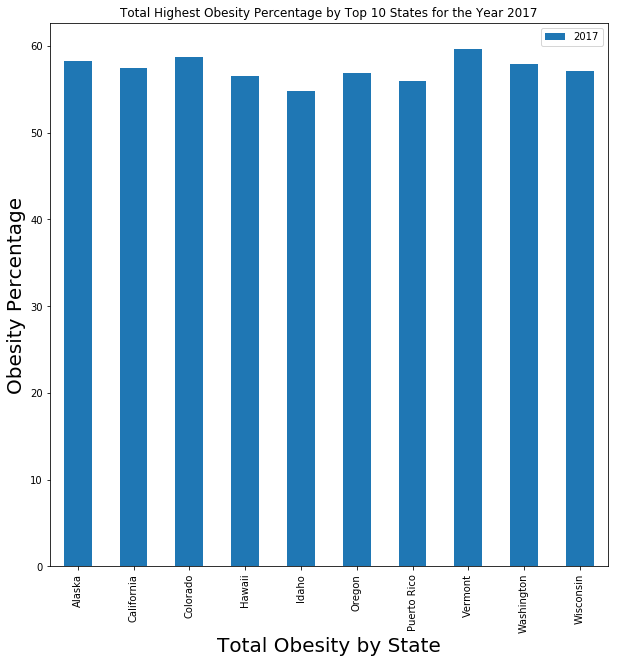

In [250]:
# Creating a bar diagram showing obesity percentage by Ethnicity, in the year 2017.

ax1 = Top10pivot.plot( kind='bar', width= .5, figsize = (10,10),  fontsize = 10, 
                 title = 'Total Highest Obesity Percentage by Top 10 States for the Year 2017')
plt.legend(loc = 'best')
ax1.set_ylabel('Obesity Percentage', fontsize = 20)
ax1.set_xlabel('Total Obesity by State', fontsize = 20)
plt.show()